<a href="https://colab.research.google.com/github/mohmmad25-hub/ANN/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Linear Regression?
Linear Regression analysis is used to predict the value of a variable 'y' based on the value of another variable 'x'. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable

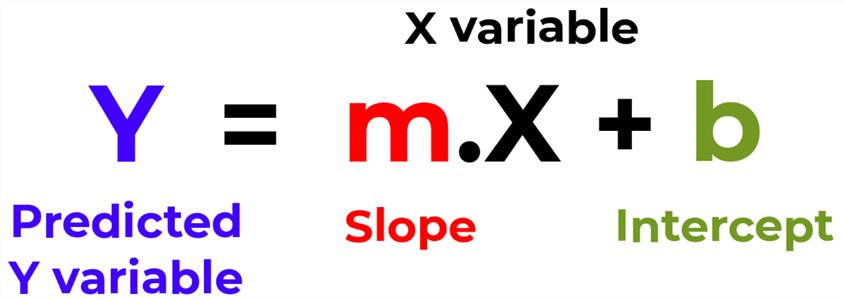

**The goal of this notebook is to show how we can import data from different sources and fit the data using linear regression**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [55]:
df.shape

(25, 2)

**Define the input and the output of the model x and y**

In [56]:
x = df.drop('Scores', axis=1)
y = df['Scores']

**Draw the relationship between Hours and Scores**

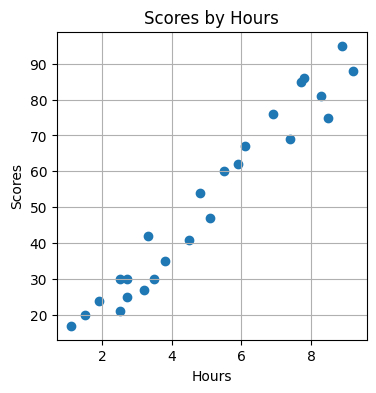

In [57]:
plt.figure(figsize=(4,4))

plt.scatter(x,y)
plt.title('Scores by Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

**Import required libraries for linear regression from Sklearn**

In [58]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Split the data to train and test**

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=23)

**Intialize your LR model and set hyperparameters**

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
Alpha = model.intercept_
Beta = model.coef_

print('Alpha', "{:.2f}".format(Alpha))
print('Beta',Beta)

print(f'y = {Alpha} + {Beta[0]}X')

Alpha 2.11
Beta [9.74596136]
y = 2.111469437725809 + 9.745961360446715X


**Calculate the actual and estimated (i,e., predicted) responses at both training and testing cases**

In [62]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

**Drawing the actual and estimated (i,e., predicted) in both training and testing cases**

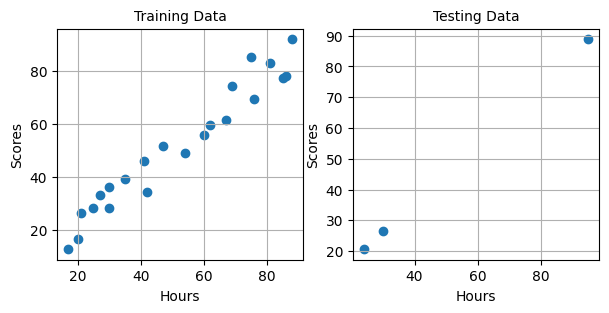

In [63]:
plt.figure(figsize=(7,3))

# subplot 1
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train)
plt.title('Training Data', fontsize = 10)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)

# subplot 2
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test)
plt.title('Testing Data', fontsize = 10)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)

plt.show()

**Calculate the model performance: MSE AND MAE**

In [64]:
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


In [65]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [66]:
# create a dataframe for performance
performance_df = pd.DataFrame({
    'metrics': ['MSE', 'MAE', 'MSE', 'MAE'],
    'DataType': ['Train', 'Train', 'Test', 'Test'],
    'Values': [mse_train, mae_train, mse_test, mae_test]
})
performance_df.T

,0,1,2,3
metrics,MSE,MAE,MSE,MAE
DataType,Train,Train,Test,Test
Values,30.336986,5.119463,20.532334,4.348102
